# Topic Modeling and Sentiment Analysis!
## After Cleaning up Tweets, We Can Clean up the Text and Perform Topic Modeling Using Latent Dirichlet Allocation and Sentiment Analysis Using the Vader Package

In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import os
pd.set_option('display.max_columns', 500)
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [21]:
# Read in data
Tweets = pd.read_csv("twitter data sets//covid_tweets_fl_wa.csv")

In [22]:
# Set 'created_at' to a datetime
Tweets['created_at'] = pd.to_datetime(Tweets['created_at'])

# Text Pre-Processing

In [23]:
stopwords = stopwords.words('english')

In [24]:
extrastopwords_mod1 = ['https', 'rt', 'april', 'jan', 'amp', 'co', '19', 'coronavirus', 'corona', 'covid', 'covid19',
                 'has', 'de', 'la', 'like', 'amp']

extrastopwords_mod2 = ['https', 'rt', 'april', 'jan', 'amp', 'co', '19', 'coronavirus', 'corona', 'covid', 'covid19',
                 'has', 'de', 'la', 'like', 'amp', 'pandemic', 'outbreak', 'virus', 'china', 'crisis', 'disease']

In [25]:
stopwords_1 = stopwords+extrastopwords_mod1
stopwords_1 = [stopwords_1[i].lower() for i in range(len(stopwords_1))]
stopwords_1 = [stopwords_1[i].replace('\n', ' ') for i in range(len(stopwords_1))]
stopwords_1 = [stopwords_1[i].replace('\t', ' ') for i in range(len(stopwords_1))]
stopwords_1 = [stopwords_1[i].replace(r"[^\w\s']", ' ') for i in range(len(stopwords_1))]
stopwords_1 = [stopwords_1[i].strip() for i in range(len(stopwords_1))]

In [26]:
stopwords_2 = stopwords+extrastopwords_mod2
stopwords_2 = [stopwords_2[i].lower() for i in range(len(stopwords_2))]
stopwords_2 = [stopwords_2[i].replace('\n', ' ') for i in range(len(stopwords_2))]
stopwords_2 = [stopwords_2[i].replace('\t', ' ') for i in range(len(stopwords_2))]
stopwords_2 = [stopwords_2[i].replace(r"[^\w\s']", ' ') for i in range(len(stopwords_2))]
stopwords_2 = [stopwords_2[i].strip() for i in range(len(stopwords_2))]

In [27]:
# Pull out just the tweets as a Series
tweet_text = Tweets['Full Tweet']

In [28]:
# Lemmatize
wn = nltk.WordNetLemmatizer()
tweet_text = Tweets['Full Tweet'].apply(lambda x: ' '.join(
    [wn.lemmatize(word) for word in x.split() if word not in stopwords_1]))

In [29]:
tweet_text = tweet_text.str.lower()
tweet_text = tweet_text.str.replace('\n', ' ')
tweet_text = tweet_text.str.replace('\t', ' ')
tweet_text = tweet_text.str.replace(r"[^\w\s']", ' ')
tweet_text = tweet_text.str.strip()
tweet_text = tweet_text[~tweet_text.isnull()]

# Model 1: Bigrams & TFIDF + Stopwords 1

In [10]:
# Tokenize the words using term frequency inverse document frequency and bigrams
# Create a vectorizer from sklearn.
tfidf_vectorizer_1 = TfidfVectorizer(ngram_range = (1,2), stop_words = stopwords_1)

# Fit the tfidf vectorizer on the bigram tweets and vectorize
tfidf_bigrams_matrix_1 = tfidf_vectorizer_1.fit_transform(tweet_text)

# Get a list of the 'tokens'
tfidf__bigrams_words_1 = tfidf_vectorizer_1.get_feature_names()

In [ ]:
tfidf_bigrams_matrix_1.shape

# Model 2: Bigrams & TFIDF + Stopwords 2

In [ ]:
# Tokenize the words using term frequency inverse document frequency and bigrams
# Create a vectorizer from sklearn.
tfidf_vectorizer_2 = TfidfVectorizer(ngram_range = (1,2), stop_words = stopwords_2)

# Fit the tfidf vectorizer on the bigram tweets and vectorize
tfidf_bigrams_matrix_2 = tfidf_vectorizer_2.fit_transform(tweet_text)

# Get a list of the 'tokens'
tfidf__bigrams_words_2 = tfidf_vectorizer_2.get_feature_names()

In [ ]:
tfidf_bigrams_matrix_2.shape

# Model 3: Unigrams & TFIDF + Stopwords 1

In [ ]:
# Tokenize the words using term frequency inverse document frequency and unigrams
# Create a vectorizer from sklearn.
tfidf_vectorizer_3 = TfidfVectorizer(stop_words = stopwords_1)

# Fit the tfidf vectorizer on the bigram tweets and vectorize
tfidf_unigrams_matrix_1 = tfidf_vectorizer_3.fit_transform(tweet_text)

# Get a list of the 'tokens'
tfidf__unigrams_words_1 = tfidf_vectorizer_3.get_feature_names()

In [ ]:
tfidf_unigrams_matrix_1.shape

# Model 4: Unigrams & TFIDF + Stopwords 2

In [ ]:
# Tokenize the words using term frequency inverse document frequency and unigrams
# Create a vectorizer from sklearn.
tfidf_vectorizer_4 = TfidfVectorizer(stop_words = stopwords_2)

# Fit the tfidf vectorizer on the bigram tweets and vectorize
tfidf_unigrams_matrix_2 = tfidf_vectorizer_4.fit_transform(tweet_text)

# Get a list of the 'tokens'
tfidf__unigrams_words_2 = tfidf_vectorizer_4.get_feature_names()

In [ ]:
tfidf_unigrams_matrix_2.shape

# Perplexity Scoring: 
### Statistical measure of how well a probability model predicts a sample.

### The statistic is somewhat meaningless on its own. The benefit of this statistic comes in comparing perplexity across different models with varying components. The model with the lowest perplexity is generally considered the “best”.
#### https://cfss.uchicago.edu/notes/topic-modeling/

In [11]:
# Perplexity for mod1
perps_1 = []
logliks_1 = []
for i in np.arange(3,10):
    print('Working on:', i)
    lda = LDA(n_components = i)
    lda.fit(tfidf_bigrams_matrix_1)
    perps_1.append(lda.perplexity(tfidf_bigrams_matrix_1))
    logliks_1.append(lda.score(tfidf_bigrams_matrix_1))

Working on: 3
Working on: 4
Working on: 5
Working on: 6
Working on: 7
Working on: 8
Working on: 9


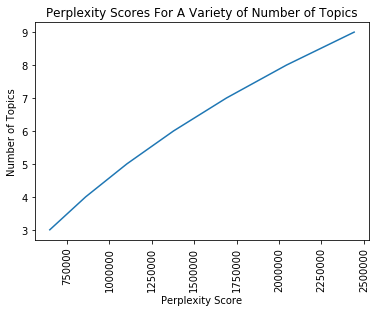

In [13]:
plt.title('Perplexity Scores For A Variety of Number of Topics')
plt.ylabel('Number of Topics')
plt.xlabel('Perplexity Score')
plt.xticks(rotation='vertical')
plt.plot(perps_1, np.arange(3,10))

In [ ]:
# Perplexity for mod2
perps_2 = []
logliks_2 = []
for i in np.arange(3,10):
    print('Working on:', i)
    lda = LDA(n_components = i)
    lda.fit(tfidf_bigrams_matrix_2)
    perps_2.append(lda.perplexity(tfidf_bigrams_matrix_2))
    logliks_2.append(lda.score(tfidf_bigrams_matrix_2))

In [ ]:
plt.plot(perps_2, np.arange(3,10))

In [ ]:
# Perplexity for mod3
perps_3 = []
logliks_3 = []
for i in np.arange(3,10):
    print('Working on:', i)
    lda = LDA(n_components = i)
    lda.fit(tfidf_unigrams_matrix_1)
    perps_3.append(lda.perplexity(tfidf_unigrams_matrix_1))
    logliks_3.append(lda.score(tfidf_unigrams_matrix_1))

In [ ]:
plt.plot(perps_3, np.arange(3,10))

In [ ]:
# Perplexity for mod4
perps_4 = []
logliks_4 = []
for i in np.arange(3,10):
    print('Working on:', i)
    lda = LDA(n_components = i)
    lda.fit(tfidf_unigrams_matrix_2)
    perps_4.append(lda.perplexity(tfidf_unigrams_matrix_2))
    logliks_4.append(lda.score(tfidf_unigrams_matrix_2))

In [ ]:
plt.plot(perps_4, np.arange(3,10))

# Latent Dirichlet Allocation Models

In [ ]:
# LDA for Bigrams & TFIDF Stopwords 1
lda = LDA(n_components = 3, random_state = 1)
lda.fit(tfidf_bigrams_matrix_1)
ldaOut = lda.transform(tfidf_bigrams_matrix_1)
p1 = pyLDAvis.sklearn.prepare(lda, tfidf_bigrams_matrix_1, tfidf_vectorizer_1)
pyLDAvis.save_html(p1, 'LDA_Vis_Mod1.html')

In [ ]:
# LDA for Bigrams & TFIDF Stopwords 2
lda = LDA(n_components = 3, random_state = 1)
lda.fit(tfidf_bigrams_matrix_2)
ldaOut = lda.transform(tfidf_bigrams_matrix_2)
p2 = pyLDAvis.sklearn.prepare(lda, tfidf_bigrams_matrix_2, tfidf_vectorizer_2)
pyLDAvis.save_html(p2, 'LDA_Vis_Mod2.html')

In [ ]:
# LDA for Unigrams & TFIDF Stopwords 1 
lda = LDA(n_components = 3, random_state = 1)
lda.fit(tfidf_unigrams_matrix_1)
ldaOut = lda.transform(tfidf_unigrams_matrix_1)
p3 = pyLDAvis.sklearn.prepare(lda, tfidf_unigrams_matrix_1, tfidf_vectorizer_3)
pyLDAvis.save_html(p3, 'LDA_Vis_Mod3.html')

In [ ]:
# LDA for Unigrams & TFIDF Stopwords 2 
lda = LDA(n_components = 3, random_state = 1)
lda.fit(tfidf_unigrams_matrix_2)
ldaOut = lda.transform(tfidf_unigrams_matrix_2)
p4 = pyLDAvis.sklearn.prepare(lda, tfidf_unigrams_matrix_2, tfidf_vectorizer_4)
pyLDAvis.save_html(p4, 'LDA_Vis_Mod4.html')

# After Reviewing LDA Models, Model 1 was Chosen as the 'Best' Model Due to Cleanest Split Among Topics

In [ ]:
# LDA for Bigrams & TFIDF Stopwords 1
lda = LDA(n_components = 3, random_state = 1)
lda.fit(tfidf_bigrams_matrix_1)
ldaOut = lda.transform(tfidf_bigrams_matrix_1)
p1 = pyLDAvis.sklearn.prepare(lda, tfidf_bigrams_matrix_1, tfidf_vectorizer_1)
pyLDAvis.save_html(p1, 'LDA_Vis_Mod1.html')

In [ ]:
Tweets['Topic']=ldaOut.argmax(axis=1)

In [ ]:
Tweets.replace({'Topic' : { 0 : 1, 1 : 2, 2 : 3 }}, inplace=True)

In [ ]:
Tweets.to_csv('Tweets.csv')

# Sentiment Analysis

## Sentiment Analysis Pt. 1 - Logistic Regression

In [31]:
#read in data 
T_data=pd.read_csv('train.csv',encoding = "ISO_8859-1:1987")

In [ ]:
len(WA)+len(FL)

In [ ]:
len(T_data)

In [ ]:
#remove the "news" tweets  
T_data=T_data.loc[T_data['sentiment']!= 2]

In [ ]:
len(T_data)

In [ ]:
#clean tweets 
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

T_data['tweets'] = T_data['message'].apply(lambda x: remove_punct(x.lower()))
FL['tweets'] = FL['derived_text'].apply(lambda x: remove_punct(x.lower()))
WA['tweets'] = WA['derived_text'].apply(lambda x: remove_punct(x.lower()))


T_data['tweets'] = T_data['tweets'].str.replace("[^a-zA-Z#]", " ")
FL['tweets'] = FL['tweets'].str.replace("[^a-zA-Z#]", " ")
WA['tweets'] = WA['tweets'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
#stops and stemmers
stop_words = set(stopwords.words('english'))
stop_words.update(('i','ve','ll','m','t','rt'))
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()


T_data['tweets'] = T_data['tweets'].apply(lambda x: ' '.join(
    [wn.lemmatize(word) for word in x.split() if word not in stop_words]))
T_data['tweets'] = T_data['tweets'].apply(lambda x: ' '.join(
    [ps.stem(word) for word in x.split() if word not in stop_words]))
#come back and check for single chracters 

#FL

FL['tweets'] = FL['tweets'].apply(lambda x: ' '.join(
    [wn.lemmatize(word) for word in x.split() if word not in stop_words]))
FL['tweets'] = FL['tweets'].apply(lambda x: ' '.join(
    [ps.stem(word) for word in x.split() if word not in stop_words]))

#WA

WA['tweets'] = WA['tweets'].apply(lambda x: ' '.join(
    [wn.lemmatize(word) for word in x.split() if word not in stop_words]))
WA['tweets'] = WA['tweets'].apply(lambda x: ' '.join(
    [ps.stem(word) for word in x.split() if word not in stop_words]))

In [ ]:
#bag of words fit
vec = CountVectorizer(ngram_range=(1, 1), max_df=10000, min_df=2,stop_words='english')
vec.fit(T_data['tweets'])
bag_of_words = vec.transform(T_data['tweets'])
bow_WA = vec.transform(WA['tweets'])
bow_FL = vec.transform(FL['tweets'])

In [ ]:
#TFIDF fit
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=10000, min_df=2,
                                   stop_words='english')
tfidf_vectorizer.fit(T_data['tweets'])
TFIDF = tfidf_vectorizer.transform(T_data['tweets'])
TFIDF_WA = tfidf_vectorizer.transform(WA['tweets'])
TFIDF_FL = tfidf_vectorizer.transform(FL['tweets'])

In [ ]:
#split data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_labels=T_data[['sentiment']].values.ravel()


X_train, X_test, y_train, y_test = train_test_split(TFIDF, train_labels,
                                                    test_size = 0.3, random_state = 0)

In [ ]:
#log reg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn import cross_validation
scikit_log_reg = LogisticRegression(max_iter=1000)
scikit_log_reg.fit(X_train,y_train)
predictions = scikit_log_reg.predict(X_test)
acc=accuracy_score(y_test, predictions)

predictionsWA = scikit_log_reg.predict(TFIDF_WA)
predictionsFL = scikit_log_reg.predict(TFIDF_FL)
print(acc)

In [ ]:
FL['Predicted']=predictionsFL
FL['Predicted'].value_counts()

In [ ]:
WA['Predicted']=predictionsWA
WA['Predicted'].value_counts()

In [ ]:
sns.countplot(predictionsWA, palette="Blues_r")
plt.title('WA Sentiment')
plt.xlabel('Sentiment Type')

In [ ]:
sns.countplot(predictionsFL, palette="Blues_r")
plt.title('FL Sentiment')
plt.xlabel('Sentiment Type')

## Sentiment Analysis Pt. 2 - Vader
### Vader: https://github.com/cjhutto/vaderSentiment#introduction

In [ ]:
# Read in Tweets
covid = pd.read_csv('Tweets.csv')

In [ ]:
# Remove line breaks
covid['Full Tweet']=covid['Full Tweet'].replace('\n', ' ', regex=True)

In [ ]:
# Use Vader to build the analyzer
analyzer = SentimentIntensityAnalyzer()

covid['rating'] = covid['Full Tweet'].apply(analyzer.polarity_scores)
sentiment=pd.concat([covid.drop(['rating'], axis=1), covid['rating'].apply(pd.Series)], axis=1)

In [ ]:
sentiment.head(5)

In [ ]:
sentiment.loc[sentiment['compound'] >= 0.05, 'Sentiment'] = 1

sentiment.loc[(sentiment['compound'] > -0.05)&(sentiment['compound'] < 0.05), 'Sentiment'] = 0
sentiment.loc[sentiment['compound'] <= -0.05, 'Sentiment'] = -1

In [ ]:
sentiment.columns

In [ ]:
sentiment.drop(['Unnamed: 0','neg', 'neu', 'pos', 'compound'], axis=1, inplace=True)

In [ ]:
df = sentiment
x, y, hue = "Topic", "Proportion", "States_Coordinates"
hue_order = ["Washington", "Florida"]
palette = sns.color_palette(['#ff9000','#4E78A0'])

ax=(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette= palette))

ax.set_title('Topic Usage')
ax.legend(title="State")
fig1= ax.get_figure()

In [ ]:
x, y, hue = "Sentiment", "Proportion", "States_Coordinates"
hue_order = ["Washington", "Florida"]
palette = sns.color_palette(['#ff9000','#4E78A0'])

ax=(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue,palette= palette))

ax.set_title('Sentiment Usage')
ax.legend(title="State")
fig1= ax.get_figure()